In [37]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


In [38]:
corona_dataset_csv = pd.read_csv('covid19_Confirmed_dataset.csv')
corona_dataset_csv.drop(['Lat','Long'],axis=1,inplace=True)
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

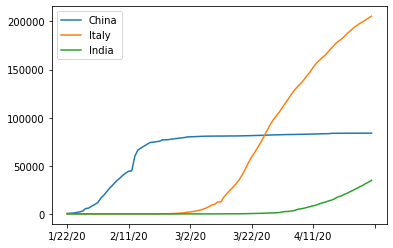

In [39]:
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['Italy'].plot()
corona_dataset_aggregated.loc['India'].plot()
plt.legend()

In [40]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for country in countries :
    max_infection_rates.append(corona_dataset_aggregated.loc[country].diff().max())
corona_dataset_aggregated['max infection rate'] = max_infection_rates

In [41]:
corona_data = pd.DataFrame(corona_dataset_aggregated['max infection rate'])

In [42]:
world_happiness_report = pd.read_csv("worldwide_happiness_report.csv")

In [43]:
columns_to_dropped = ['Overall rank','Score','Generosity','Perceptions of corruption']
world_happiness_report.drop(columns_to_dropped,axis=1 , inplace=True)


In [44]:
world_happiness_report.set_index(['Country or region'],inplace=True)

In [45]:
data = world_happiness_report.join(corona_data).copy()

In [46]:
data.corr()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate
GDP per capita,1.000000,0.754906,0.835462,0.379079,0.250118
Social support,0.754906,1.000000,0.719009,0.447333,0.191958
Healthy life expectancy,0.835462,0.719009,1.000000,0.390395,0.289263
Freedom to make life choices,0.379079,0.447333,0.390395,1.000000,0.078196
max infection rate,0.250118,0.191958,0.289263,0.078196,1.000000


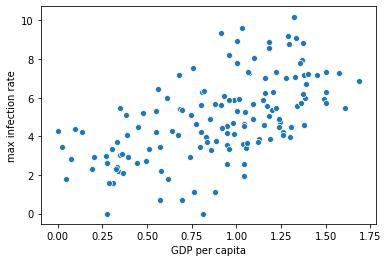

In [47]:
x = data['GDP per capita']
y = data['max infection rate']
sns.scatterplot(x,np.log(y))

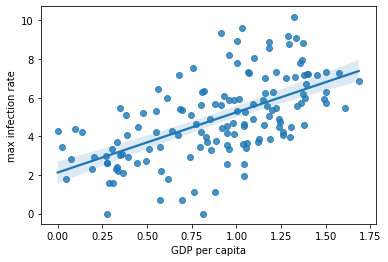

In [48]:
sns.regplot(x,np.log(y))

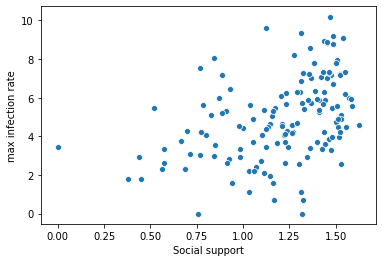

In [49]:
x = data['Social support']
y = data['max infection rate']
sns.scatterplot(x,np.log(y))

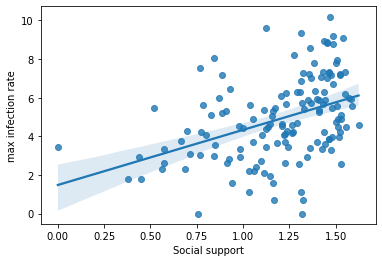

In [50]:
sns.regplot(x,np.log(y))

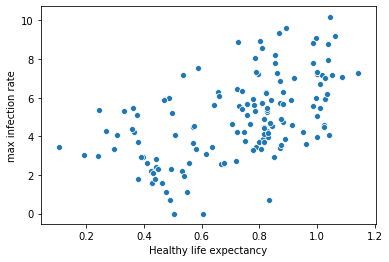

In [51]:
x = data['Healthy life expectancy']
y = data['max infection rate']
sns.scatterplot(x,np.log(y))

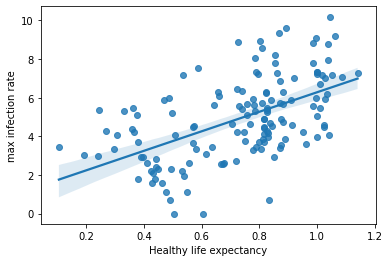

In [52]:
sns.regplot(x,np.log(y))

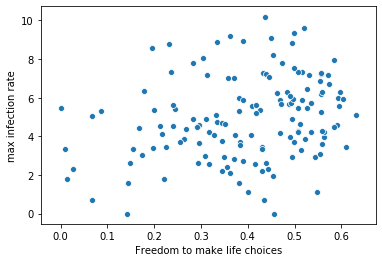

In [53]:
x = data['Freedom to make life choices']
y = data['max infection rate']
sns.scatterplot(x,np.log(y))

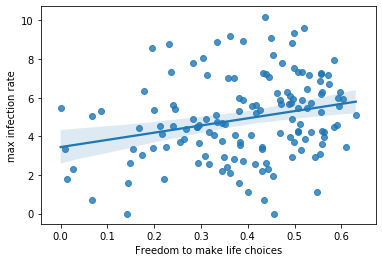

In [54]:
sns.regplot(x,np.log(y))